# import of required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
#os.chdir('.\\Desktop\\EDUCATE\\DATA CSV')
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

# step 1:  data acquisition  read data from the csv files

In [46]:
file1 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars1.csv'
file2 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars2.csv'

cars1 = pd.read_csv(file1)   # read in the first data file
cars2 = pd.read_csv(file2)   # read in the second data file

# we have other columns named unamed which contains only NaN values
# so we drop them.
cars1.drop(cars1.columns[9:],axis=1,inplace=True) 

# concatenate the two data
cars = pd.concat([cars1,cars2])
cars.head()  # print the first five rows of the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


# step 2  inspection   inspecting the columns of the dataset

In [47]:
# let's see the meaning of the columns of the data
# mpg - Milieage/Miles Per Galon
# cylinders - the power unit of the car where gasoline is turned into power
# displacement - engine displacement of the car
# horsepower - rate of the engine performance
# weight - the weight of a car
# acceleration - the acceleration of a car
# model - model of the car
# origin - the origin of the car 
# car - the name of the car

cars.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.1+ KB


# step 2  inspection   inspecting the horsepower column

In [53]:
# we can see that the horsepower column is an object datatype
# let's try to see what the odd value is in the horsepower column
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

# step 3:  data cleaning

In [18]:
# we can see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower
cars.horsepower = cars.horsepower.str.replace('?','NaN').astype(float)
cars.horsepower.fillna(cars.horsepower.mean(),inplace=True)
cars.horsepower = cars.horsepower.astype(int)

# print the info of the data again to see the datatypes of columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int64  
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 29.5+ KB


# step 3: data cleaning  drop and some columns, retain only the important columns

In [54]:
# won't be needing the car column so we drop it
cars = cars.drop('car',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


# step 5:  analysis   summary statistics

In [55]:
# let's print the summary statistics of the data
display(cars.describe())

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.268683,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# step 7:  visualization  histogram visualization of the data

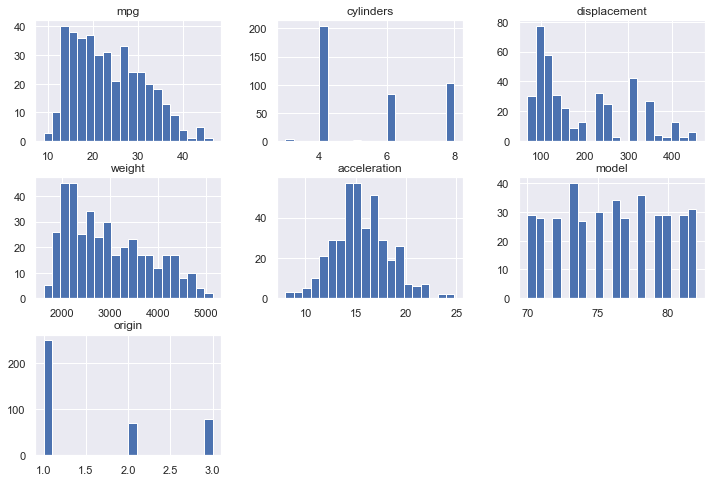

In [56]:
# let's visualize the distribution of the features of the cars
cars.hist(figsize=(12,8),bins=20)
plt.show()

# step 7:  visualizaiton  heat map visualization of the data

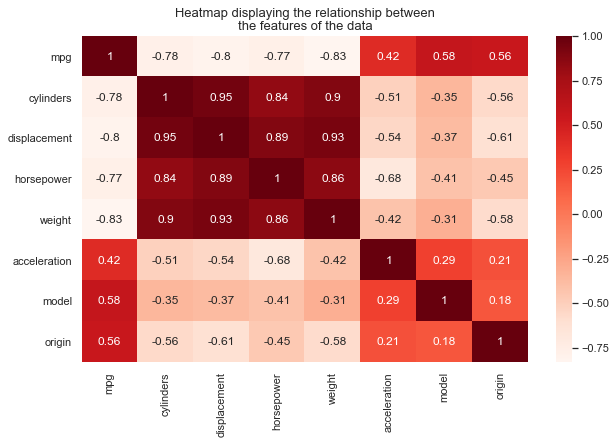

In [22]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

# step 4:  data pre-processing  checking for multicollinearity and doing feature selection

In [23]:
# We can also check for multicollinearity using the variance inflation factor.
# A variable/feature affected by multicollinearity will have a value greater than 5....
#...... when we print out the series from the variance inflation factor
# We will have to do a feature selection to get rid of the multicollinearity.

X1 = sm.tools.add_constant(cars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

# Let's drop the columns that highly correlate with each other
newcars = cars.drop(['cylinders','displacement','weight'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print('Series before feature selection: \n\n{}\n'.format(series1))
print('Series after feature selection: \n\n{}'.format(series2))

Series before feature selection: 

const           780.806732
mpg               5.583604
cylinders        10.742595
displacement     22.161456
horsepower        9.057010
weight           13.468497
acceleration      2.515892
model             1.954983
origin            1.853451
dtype: float64

Series after feature selection: 

const           715.683761
mpg               3.982206
horsepower        4.131289
acceleration      2.029527
model             1.607080
origin            1.542532
dtype: float64


# step 5:  analysis   doing pearson's correlation

In [11]:
# print the correlation between the mpg and the remaining variables
print('Correlation between mpg and the remaining variables:\n\n{}'.format(newcars.corr().mpg))

Correlation between mpg and the remaining variables:

mpg             1.000000
horsepower     -0.771543
acceleration    0.420289
model           0.579267
origin          0.563450
Name: mpg, dtype: float64


# step 6:  modeling   model using linear regression()

In [51]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

# step 6:  modeling  model prediction and performance metrics

In [52]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7553135661809439

Test score: 0.7271939488775567

Overall model accuracy: 0.7271939488775567

Mean Squared Error: 17.43282026200509
